In [105]:
import pandas as pd

In [111]:
# open the data, note we add an additional prarameter 'index_col'
# this makes the index the first column (airline name) and is convenient
# because some types of plots will automatically use this index
data=pd.read_csv('airlines.csv', index_col=0)

In [113]:
# size of data
data.shape

(56, 7)

In [114]:
# look at the first few rows
data.head()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
airline,,,,,,,
Aer Lingus,320906734,2,0,0,0,0,0
Aeroflot*,1197672318,76,14,128,6,1,88
Aerolineas Argentinas,385803648,6,0,0,1,0,0
Aeromexico*,596871813,3,1,64,5,0,0
Air Canada,1865253802,2,0,0,2,0,0


In [115]:
# make a copy so we can normalize the data (so all stats are scaled to km flown)
datan=data.copy()

In [116]:
# make a scaling factor which is the ratio of the max km flown to an airlines km flown
# this helps us put all stats on the same scale
datan['scaling_factor'] = data.avail_seat_km_per_week.max()/data.avail_seat_km_per_week

In [117]:
# low loop through all the columns and scale
for c in data.columns:
    if c!='avail_seat_km_per_week':
        datan[c]=datan[c]*datan.scaling_factor

In [118]:
datan.head()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,scaling_factor
airline,,,,,,,,
Aer Lingus,320906734,44.494493,0.00000,0.000000,0.000000,0.000000,0.000000,22.247247
Aeroflot*,1197672318,453.033881,83.45361,763.004431,35.765833,5.960972,524.565546,5.960972
Aerolineas Argentinas,385803648,111.029919,0.00000,0.000000,18.504986,0.000000,0.000000,18.504986
Aeromexico*,596871813,35.883540,11.96118,765.515531,59.805901,0.000000,0.000000,11.961180
Air Canada,1865253802,7.655035,0.00000,0.000000,7.655035,0.000000,0.000000,3.827517


In [119]:
# now sort by the fatal_accidents_85_99' column.  
datan=datan.sort_values(by=['fatal_accidents_85_99'], ascending=False)

In [121]:
datan.head()

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,scaling_factor
airline,,,,,,,,
Aeroflot*,1197672318,453.033881,83.453610,763.004431,35.765833,5.960972,524.565546,5.960972
Ethiopian Airlines,488560643,365.322678,73.064536,2440.355486,73.064536,29.225814,1344.387454,14.612907
Royal Air Maroc,295705339,120.716307,72.429784,1231.306330,72.429784,0.000000,0.000000,24.143261
Philippine Airlines,413007158,121.002840,69.144480,1279.172879,34.572240,17.286120,17.286120,17.286120
Pakistan International,348563137,163.856485,61.446182,4792.802178,204.820606,40.964121,942.174787,20.482061


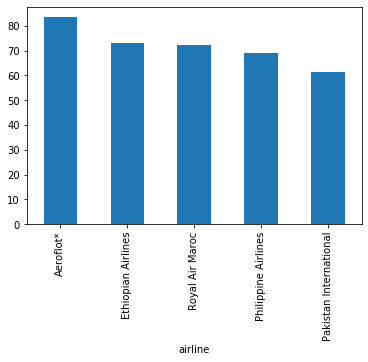

In [122]:
# now let's plot the worst 5 airlines in terms of fatal accidents... because of our 'data wrangling'
# we can do it in one line
# note the data is ordered by accident rate worst to best
# the index is the airline name
# so
# datan.fatal_accidents_85_99 - means get the fatal_accidents_85_99 column
# [0:5] means get the rist 5 rows
# .plot means get acess to the plot module
# .bar() means make a bar plotf
datan.fatal_accidents_85_99[0:5].plot.bar()